# Identitas

**Nama: Bagas Rayhan Sebastian**

**NIM: A11.2022.14715**

**Kelompok: 4413**

**Topik: Prediksi Suhu Rata2 dengan Analisis Trend Least Square Method**

# Latar Belakang

Menurut KBBI, ukuran kuantitatif terhadap temperatur; panas dan dingin, diukur dengan termometer. Suhu berperan sangat penting dalam kehidupan sosial manusia, misalkan untuk menjemur gabah, menentukan jenis tanaman pangan, hingga tempat penyimpanan memerlukan suhu yang optimal. Untuk itu model yang dapat memprediksi suhu secara akurat merupakan hal yang sangat penting.

Prediksi suhu berkaitan berarti menentukan nilai suhu di masa mendatang, menggunakan nilai atau data dimasa lampau. Oleh karena itu jenis data yang digunakan merupakan data dengan timeseries. Salah satu metode yang dapat digunakan untuk memprediksi timeseries adalah analisis trend. 

## Timeseries

Timeseries merupakan dataset yang memiliki kolom waktu dan diambil secara berurutan dan teratur. Dataset timeseries memiliki beberapa Komponen, diantaranya:
 - Memiliki Trend
 - Memiliki Season
 - Memiliki siklus

Salah satu pendekatan yang digunakan untuk melakukan peramalan timeseries adalah dengan model analisis trend. Beberapa metode analisi Trend adalah metode rata-rata terkecil, rata-rata tengahan, dan trend bebas

## Metode Rata-Rata Kuadrat Terkecil

Analisis trend adalah teknik yang digunakan untuk memprediksi arah kecenderungan data timeseries. Analisis trend dengan metode kuadrat terkecil pernah dilakukan oleh Rachmad Budi Setiawan dan Erna Zuni Astuti (2016). 
Pada penelitian itu, dilakukan proses analisis perbadingan model prediksi pendapatan di BLU UPTD TERMINAL 
MANGKANG SEMARANG, antara model rata-rata kuadrat terkecil dan setengah rata-rata, dengan dataset pendapatan bulanan perusahaan dari bulan Oktober 
2012 - Maret 2015.

Metode Kuadrat Terkecil atau Least Squared Method digunakan untuk menemukan hubungan linear antara dua variabel 
dengan menentukan garis tren yang mempunyai jumlah terkecil dari kuadrat selisih data asli dengan data pada garis 
tren. Hasil dari metode ini adalah sebuah persamaan garis dengan koefisien nilai kecenderungan negatif atau positif. 
Selanjutnya melalui persamaan garis tersebut dapat diperoleh nilai prediksi untuk periode berikutnya.

Rumus: 
 - Persamaan umum: `Yp = A + Bx`
 - B: `B = sum(xY)/sum(x**2)`
 - A: `A = sum(Y)/n`


# Alur

1. Membuang kolom yang tidak terpakai

    Atribut yang akan digunakan adalah timeseries dan nilai suhu rata-rata harian. Kolom selain itu akan didrop karena tidak terpakai

2. Mengisi nilai kolom yang hilang. 

    Nilai yang hilang akan diisi menggunakan interpolasi atau nilai rata-rata

3. Melakukan transformasi nilai timeseries menjadi nilai x dengan aturan berikut
    - Jika jumlah data ganjil, maka x tengah diberi nilai 0
    - Jika jumlah data genap, maka x tengah diberi nilai -1 dan 1
    - Nilai x yang berada diatas data tengah akan bernilai negatif
    - Nilai x yang berada dibawah data tengah akan bernilai positif

4. Mencari model persamaan Rata-rata terakhir.
    Persamaan model persamaan Rata-rata terakhir didapatkan dengan mencari nilai konstanta A dan Koefisien B
    - `B = sum(xY)/sum(x**2)`
    - `A = sum(Y)/n`
    - Sehingga didapat: `Yp = A + Bx`

5. Mencari rmse dan mape
    Rmse dan mape adalah dua metrik yang sangat umum digunakan untuk mengukur error ketika melakukan regresi. Cara kerja dari kedua metriks ini adalah dengan menghitung selisih antara nilai aktual dengan hasil prediksi

![bagan](./flow_pm.drawio.png)


## Dataset

Dataset yang digunakan berasal dari database online BMKG Kota Semarang. [Dataset bisa didapatkan disini](https://dataonline.bmkg.go.id/home)
Dataset yang digunakan mencatat suhu harian dari 1 Januari 2024 - 31 Mei 2024
Dataset ini memiliki atribut tanggal dan nilai suhu rata-rata

Pada tahap ini, akan dimuat data excel bulan januari - mei kemudian digabungkan menjadi 1 buah dataframe. Kemudian tidak perlu melakukan drop karena kedua kolom tersebut terpakai.

In [1]:
import pandas as pd

dir = "dataset/"
tformat = '%d-%m-%Y'

jan = pd.read_excel(dir + "jan24.xlsx")
jan = jan.iloc[0:32, [0, 1]]
jan['Tanggal'] = pd.to_datetime(jan['Tanggal'], format=tformat)

feb = pd.read_excel(dir + "feb24.xlsx")
feb = feb.iloc[0:30, [0,1]]
feb['Tanggal'] = pd.to_datetime(feb['Tanggal'], format=tformat)

march = pd.read_excel(dir + "mar24.xlsx")
march = march.iloc[0:32, [0, 1]]
march['Tanggal'] = pd.to_datetime(march['Tanggal'], format=tformat)

apr = pd.read_excel(dir + "Apr24.xlsx")
apr = apr.iloc[0:31, [0,1]]
apr['Tanggal'] = pd.to_datetime(apr['Tanggal'], format=tformat)

mei = pd.read_excel(dir + "Mei24.xlsx")
mei = mei.iloc[0:32, [0, 1]]
mei['Tanggal'] = pd.to_datetime(mei['Tanggal'], format=tformat)

# merge
# jan -> feb -> mar -> apr -> mei
df = pd.concat([jan, feb, march, apr, mei], ignore_index=True)
# -> maret
df.tail()

,Tanggal,Tavg
147,2024-05-27,30.4
148,2024-05-28,30.1
149,2024-05-29,30.2
150,2024-05-30,29.9
151,2024-05-31,30.5


Interpolasi digunakan untuk menggantikan nilai **Tavg** yang hilang. Interpolasi dipilih karena setiap data pada baris dianggap penting dan sensitif karena berupa data lapangan.

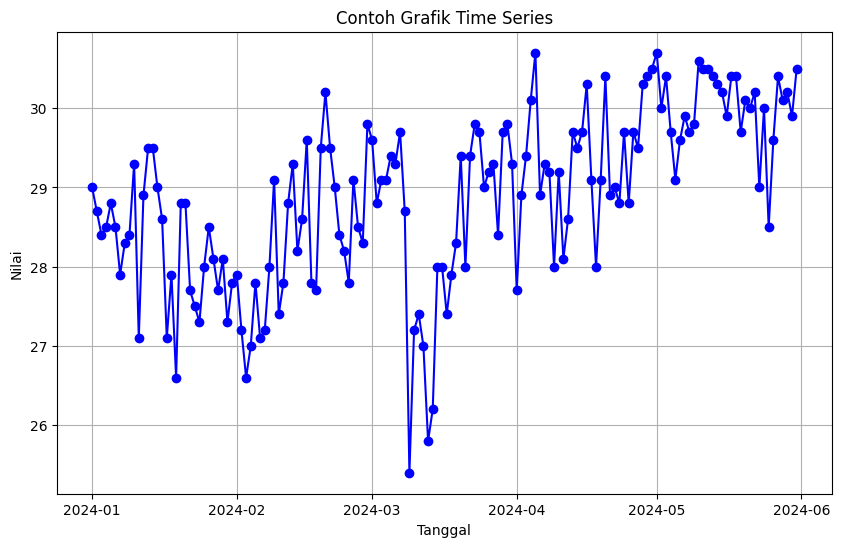

In [2]:
import matplotlib.pyplot as plt

df = df.interpolate()

plt.figure(figsize=(10, 6))
plt.plot(df['Tanggal'], df['Tavg'], marker='o', linestyle='-', color='b')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Contoh Grafik Time Series')
plt.grid(True)
plt.show()

## Model
Untuk membuat model kuadrat rata2 terkecil, langkah pertama adalah menentukan nilai X seperti ketentuan di atas. Kemudian kita bisa mendapatkan koefisien dan intercept dengan library `numpy`

In [3]:
import numpy as np
# 1 2 3 4 5 6 7 8
# 4 3 2 1 1 2 3 4
# Mencari nilai x
N = len(df)
print("length: ",N)
mid = np.array([-1, 1])
# atas
top = []
i = (N/2 * -1)
while i < -1:
    top.append(i)
    i+=1

print(f"atas: {top[0]} - {top[len(top) - 1]}")
top = np.array(top)

# bawah
i = 2
btm = []
while i <= N/2:
    btm.append(i)
    if i < 5:
        print(i)
    i+=1

print(f"bawah: {btm[0]} - {btm[len(btm) - 1]}")
btm = np.array(btm)

X = np.hstack((top, mid, btm))
# print(X)

A = np.vstack([X, np.ones(len(X))]).T

length:  152
atas: -76.0 - -2.0
2
3
4
bawah: 2 - 76


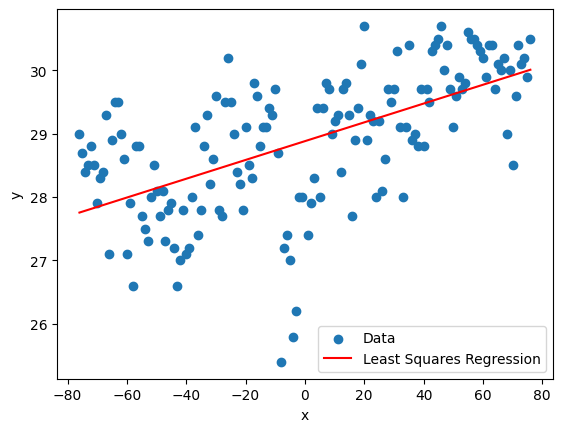

In [4]:
Y = np.array(df['Tavg'])
m1, c1 = np.linalg.lstsq(A, Y)[0]

# Plot data dan garis regresi terbaik
plt.scatter(X, Y, label='Data')
plt.plot(X, m1 * X + c1, color='red', label='Least Squares Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Menghitung Rmse dan Mape

#### Root Mean Squared Error
Root Mean Squared Error (rmse) atau error rata2 akar kuadrat adalah metode pengukuran skala error dengan cara menghitung rata-rata kuadrat selisih antara nilai aktual dengan prediksi, kemudian diakar kuadratkan.

` rmse = sqrt((sum(Y - Yp)/N)**2)`

dimana: 
 - `sqrt()` adalah fungsi akar kuadrat
 - `sum()` adalah fungsi penjumlahan dari suku ke1 - suku ke-n
 - `Y` adalah Nilai aktual
 - `Yp` adalah Nilai prediksi
 - `N` adalah banyaknya dari suku ke-1 sampai suku ke-n

#### Mean Absolute Percentage Error 
Mean absolute percentage error (mape) adalah metrik pengukuran tingkat error dengan cara mencari persentase selisih rata-rata absolut antara nilai aktual dengan nilai prediksi

` mape = sum(|Y-Yp|/Y)/N * 100`

dimana: 
 - `sum()` adalah fungsi penjumlahan dari suku ke1 - suku ke-n
 - `Y` adalah Nilai aktual
 - `Yp` adalah Nilai prediksi
 - `N` adalah banyaknya dari suku ke-1 sampai suku ke-n


In [5]:
# rmse
Y_pred = m1 * X + c1
residual = Y - Y_pred

rmse = np.sqrt(np.mean(residual**2))
print(f"RMSE: {rmse:.2f}")

RMSE: 0.88


In [6]:
# mape
mape = np.mean(np.abs(residual)/Y) * 100
print(f"MAPE: {mape:.2f} %")

MAPE: 2.41 %


# Hasil dan Kesimpulan

Suhu dimasa mendatang dapat diprediksi menggunakan model Least Square. Dari data suhu harian yang diberikan selama bulan Januari - Mei, Model least square menghasilkan akurasi yang sangat baik dengan **RMSE = 0.88** dan **MAPE = 2.41%**.